# Estudo de ampacidade por estação INMET

In [1]:
from normaslt import geral
import pandas as pd
import seaborn as sns
import numpy as np
from math import pi, log, sqrt
from scipy.stats import lognorm
import matplotlib.pyplot as plt
from reliability.Probability_plotting import Lognormal_probability_plot
from pandas.plotting import autocorrelation_plot
import pytz
import missingno as msno

In [2]:
cabo = geral.dbCabo.CAA_HAWK
amp = 800
estacao = 'Cuiabá'
rugcond = 0.9
absorcao = 0.6
emicond = 0.6

In [3]:
dados, _, _, alt = geral.readEstacao(estacao, 2015, 2023)

/home/carloska/programas/nbr5422/python/normaslt/geral.py:373: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rad'] = df['rad'].fillna(0)
/home/carloska/programas/nbr5422/python/normaslt/geral.py:373: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rad'] = df['rad'].fillna(0)
/home/carloska/programas/nbr5422/python/normaslt/geral.py:373: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.s

<Axes: >

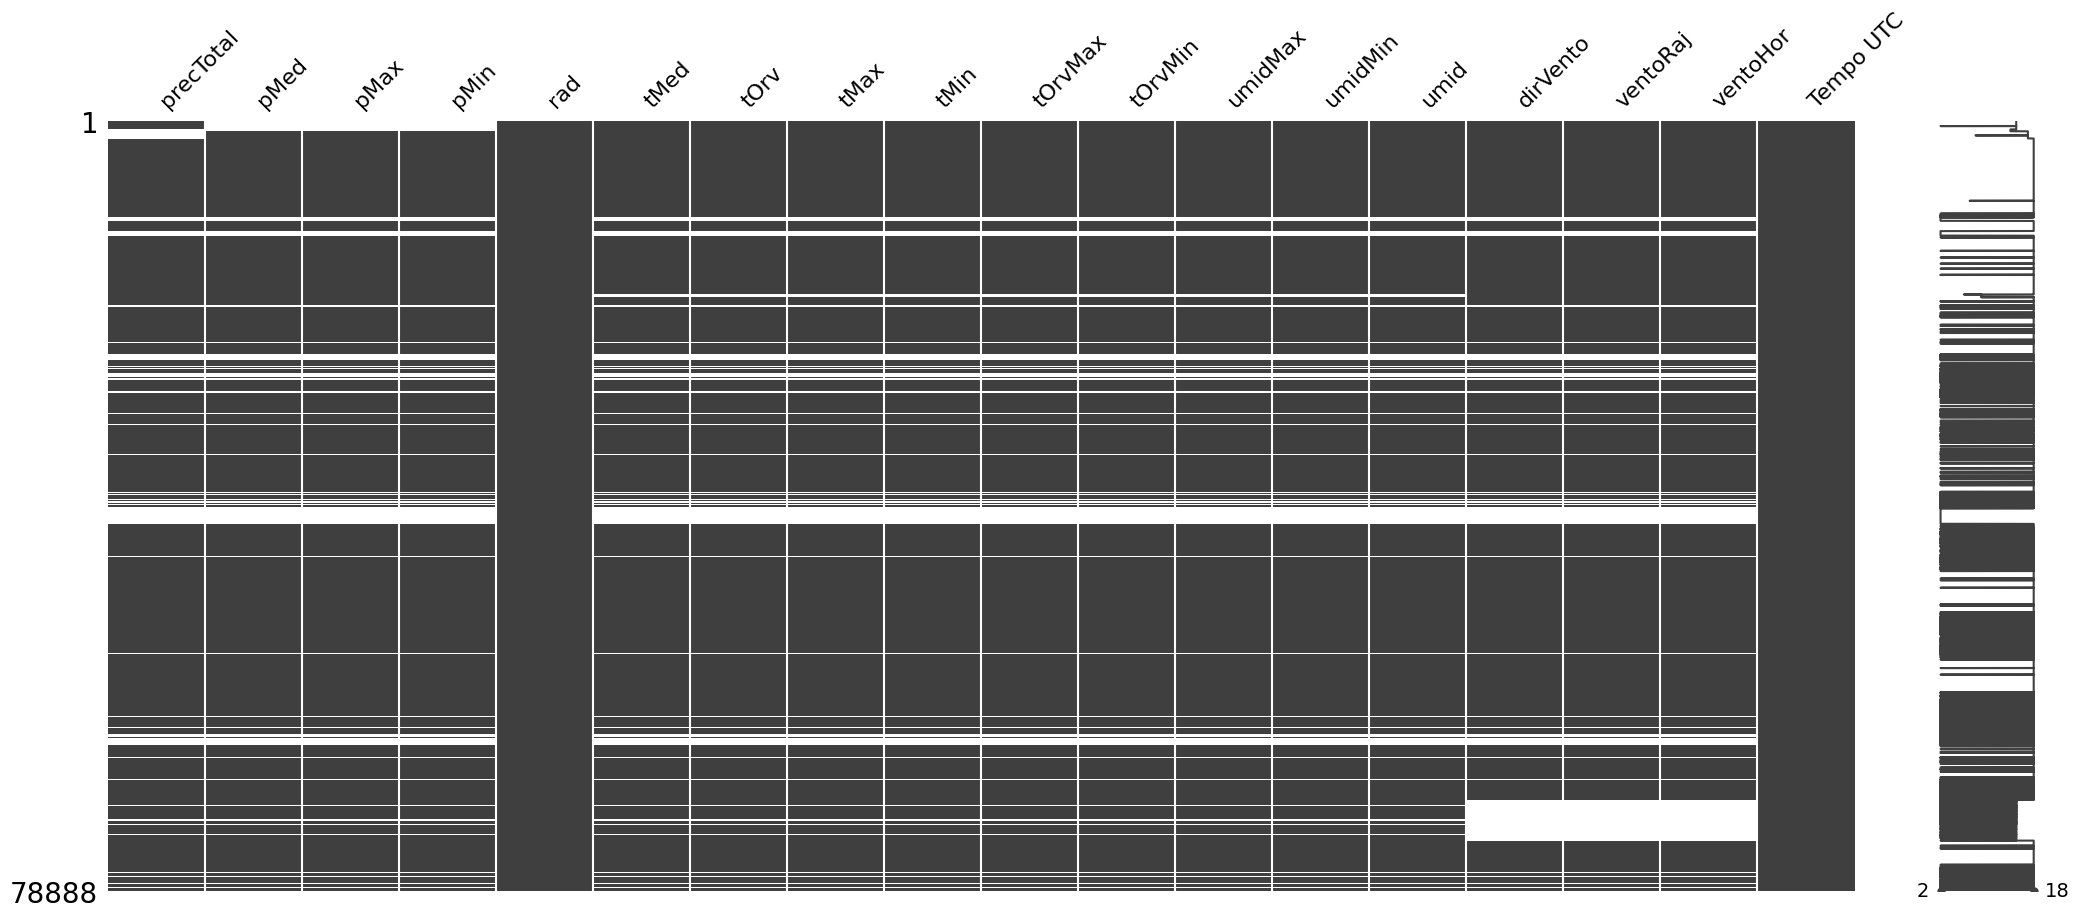

In [4]:
# Checa qualidade da base
msno.matrix(dados)

In [5]:
# Atentar que a hora é UTC, normalizar para o fuso (-3)
local_timezone = pytz.timezone('Brazil/East')
dados['tempo'] = dados['Tempo UTC'].dt.tz_localize('UTC').dt.tz_convert(local_timezone)
# Alta sensibilidade para o vento horário - considerar média móvel
dados['tCond'] = dados.apply(lambda x: geral.tempCondutorCigre(amp, x.ventoHor, pi/2, x.tMax, x.rad, alt, cabo, rugcond, absorcao, emicond), axis=1)
dados['hora'] = dados['tempo'].dt.hour
dados['mes'] = dados['tempo'].dt.month
dados['ano'] = dados['tempo'].dt.year
dados['HD'] = dados['tempo'].apply(lambda x: f"{x.hour} {x.day}")
dados['DMA'] = dados['tempo'].apply(lambda x: f"{x.day} {x.month} {x.year}")
dados['MA'] = dados['tempo'].apply(lambda x: f"{x.month} {x.year}")
# Definições conforme ANEEL ReN 191/2005
dados['dia'] = dados['tempo'].apply(lambda x: 6 <= x.hour < 18)
dados['verao'] = dados['tempo'].apply(lambda x: x.month <= 3 or x.month >= 10)
dados.describe().round(2)

precTotal   pMed   pMax   pMin  ...  tCond  hora   mes   ano
count      70107  69983  69924  69923  ...  66925 78888 78888 78888
mean        0.14 987.88 988.18 987.59  ...  73.97  11.5  6.52  2019
min            0  974.8  974.9  974.6  ...  28.84     0     1  2014
25%            0  984.6  984.9  984.3  ...  65.38     6     4  2017
50%            0  987.7    988  987.4  ...  72.53    12     7  2019
75%            0  990.9  991.2  990.7  ...  80.65    18    10  2021
max         67.8 1007.4 1007.5 1007.3  ... 131.94    23    12  2023
std         1.38   4.39   4.37    4.4  ...  13.63  6.92  3.45  2.58

[8 rows x 22 columns]

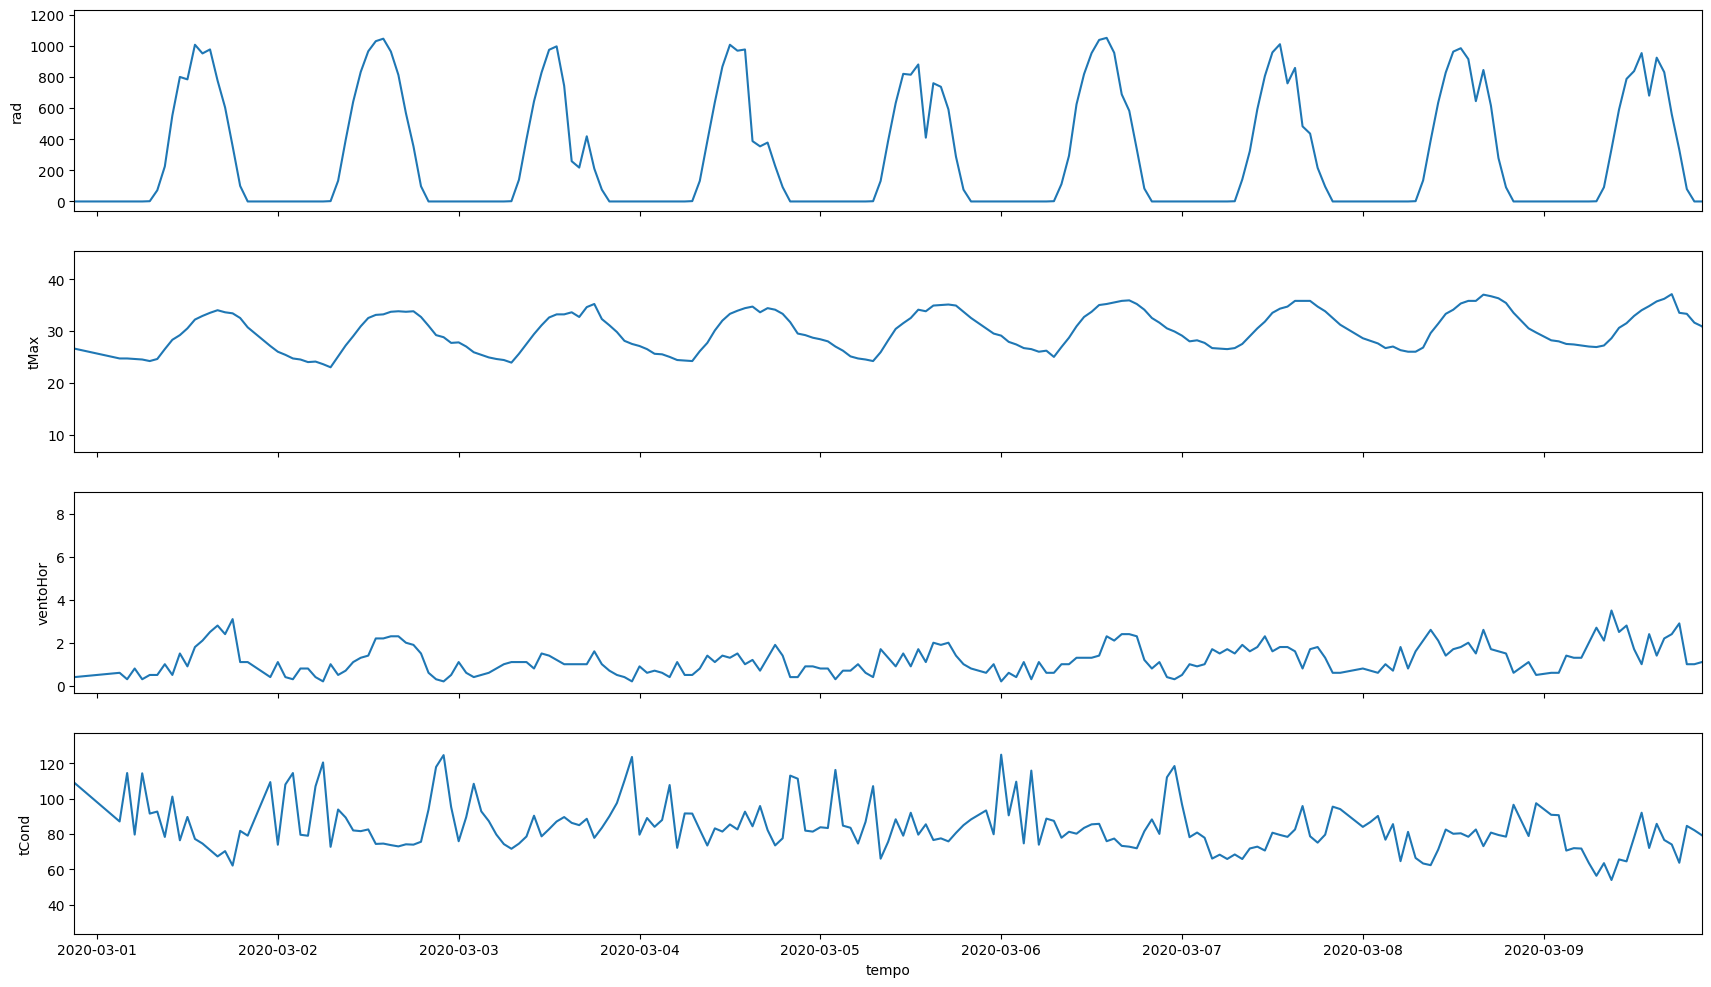

In [9]:
fig, axs = plt.subplots(4)
ax = sns.lineplot(ax=axs[0], data=dados, x='tempo', y='rad', legend=False)
ax.set_xlim(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-03-10'))
ax.set(xticklabels=[])
ax.set(xlabel=None)
ax = sns.lineplot(ax=axs[1], data=dados, x='tempo', y='tMax', legend=False)
ax.set_xlim(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-03-10'))
ax.set(xticklabels=[])
ax.set(xlabel=None)
ax = sns.lineplot(ax=axs[2], data=dados, x='tempo', y='ventoHor', legend=False)
ax.set_xlim(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-03-10'))
ax.set(xticklabels=[])
ax.set(xlabel=None)
ax = sns.lineplot(ax=axs[3], data=dados, x='tempo', y='tCond', legend=False)
ax.set_xlim(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-03-10'))
fig.set_size_inches(21, 12)


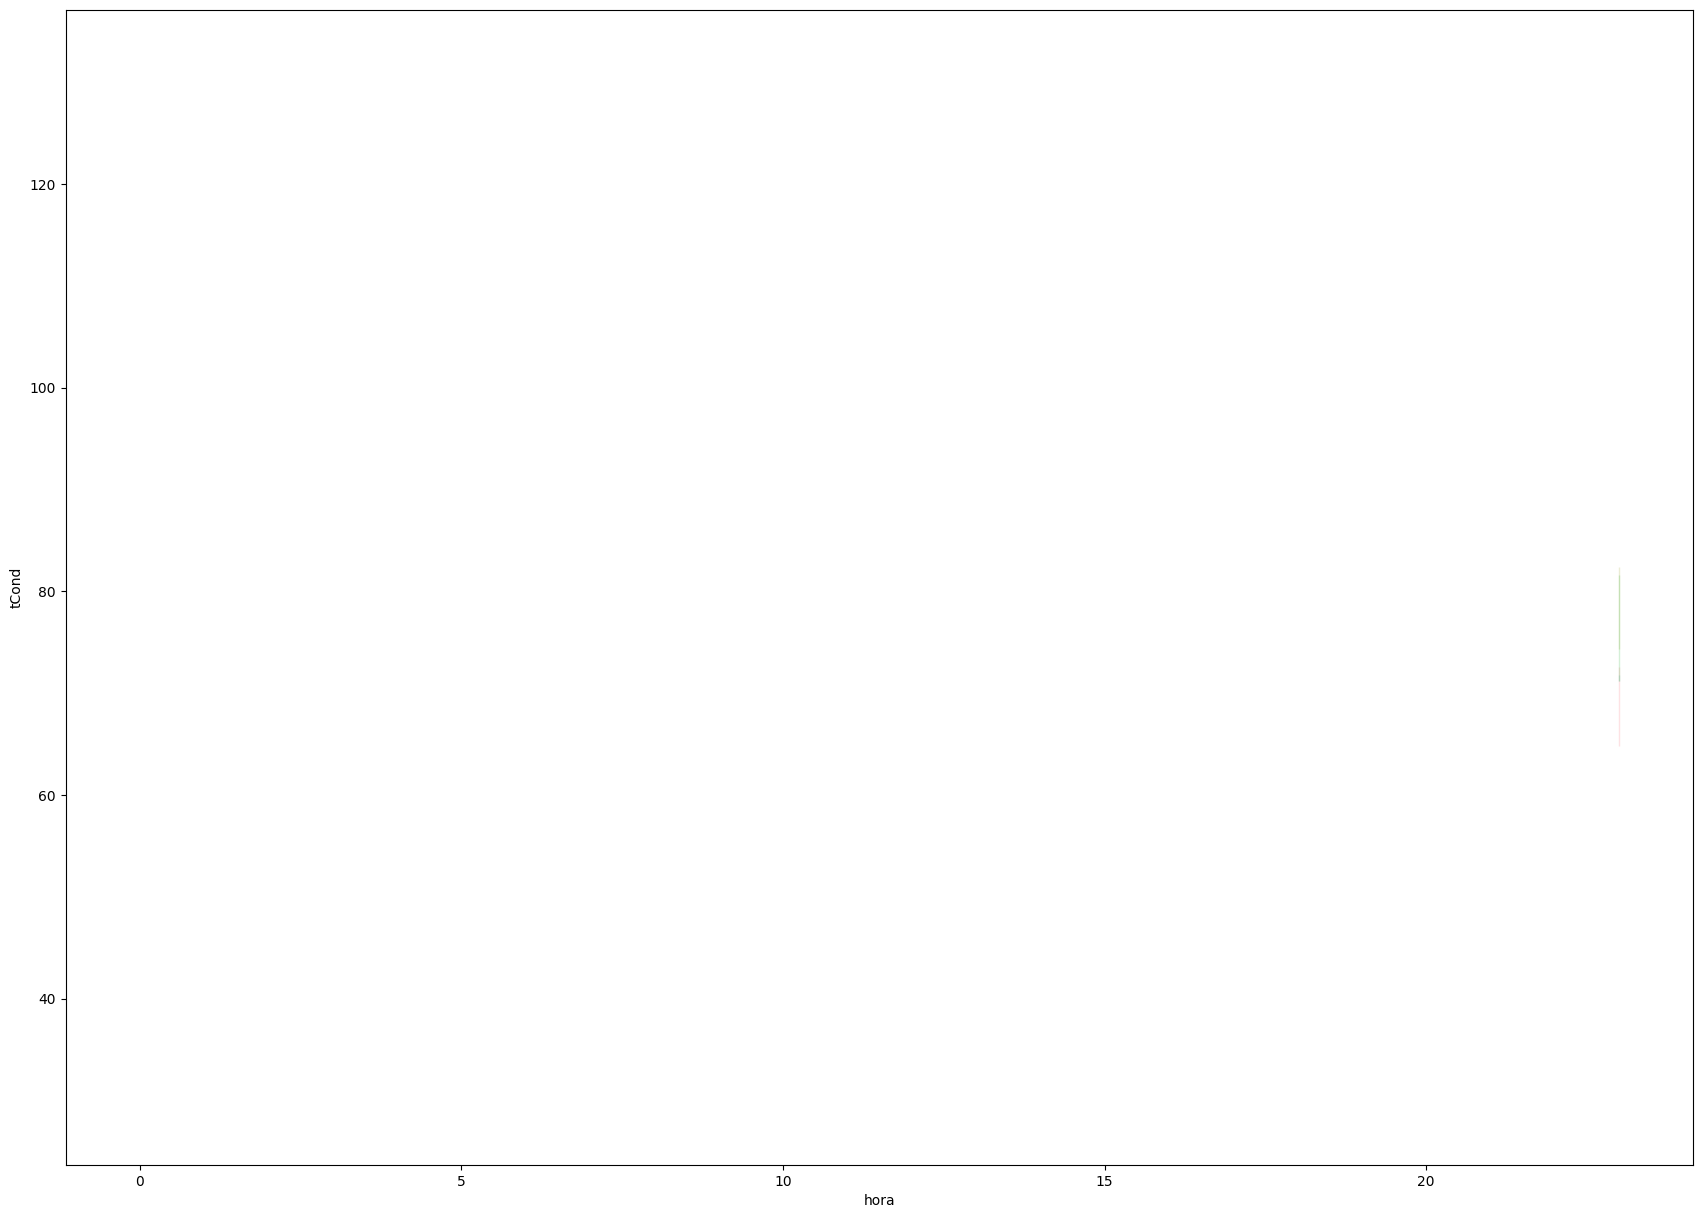

In [29]:
ax = sns.lineplot(data=dados, x='hora', y='tCond', hue='DMA', legend=False, lw=0.5)
ax.figure.set_size_inches(21, 15)

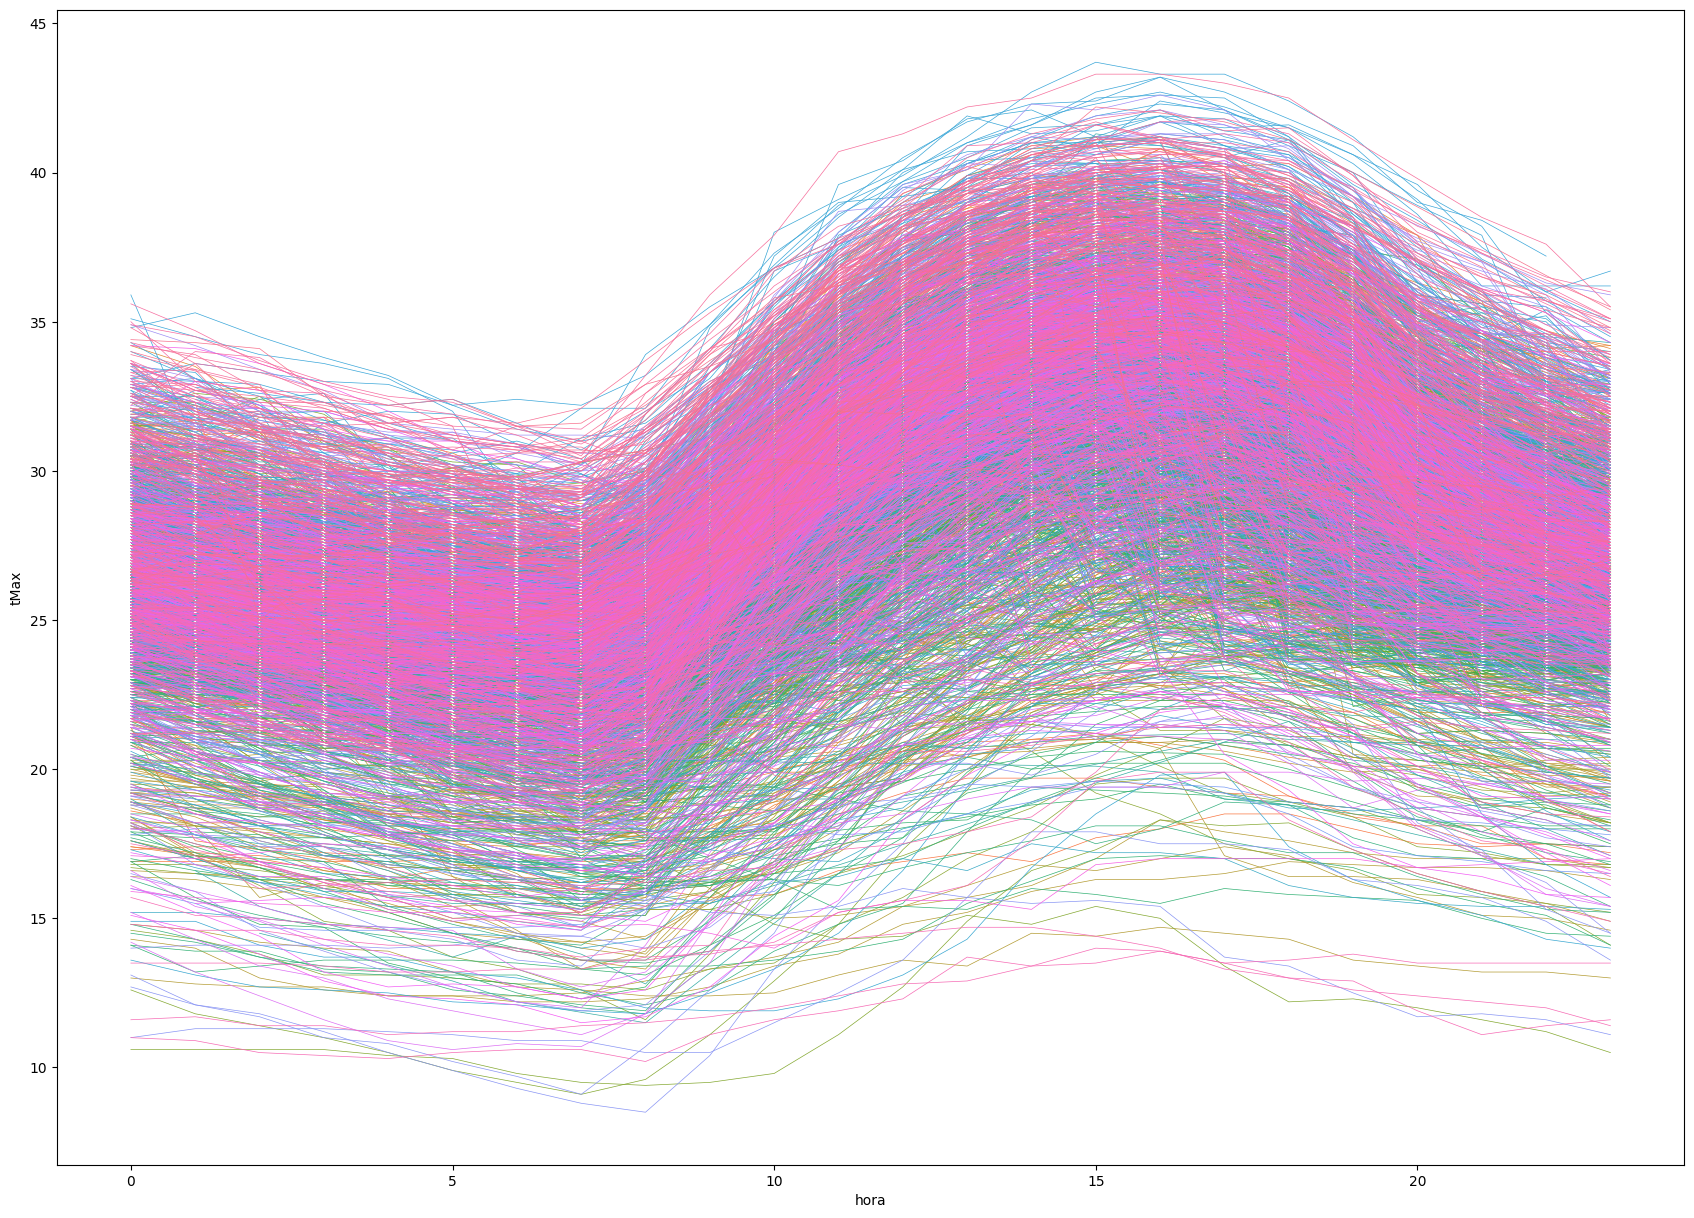

In [28]:
ax = sns.lineplot(data=dados, x='hora', y='tMax', hue='DMA', legend=False, lw=0.5)
ax.figure.set_size_inches(21, 15)

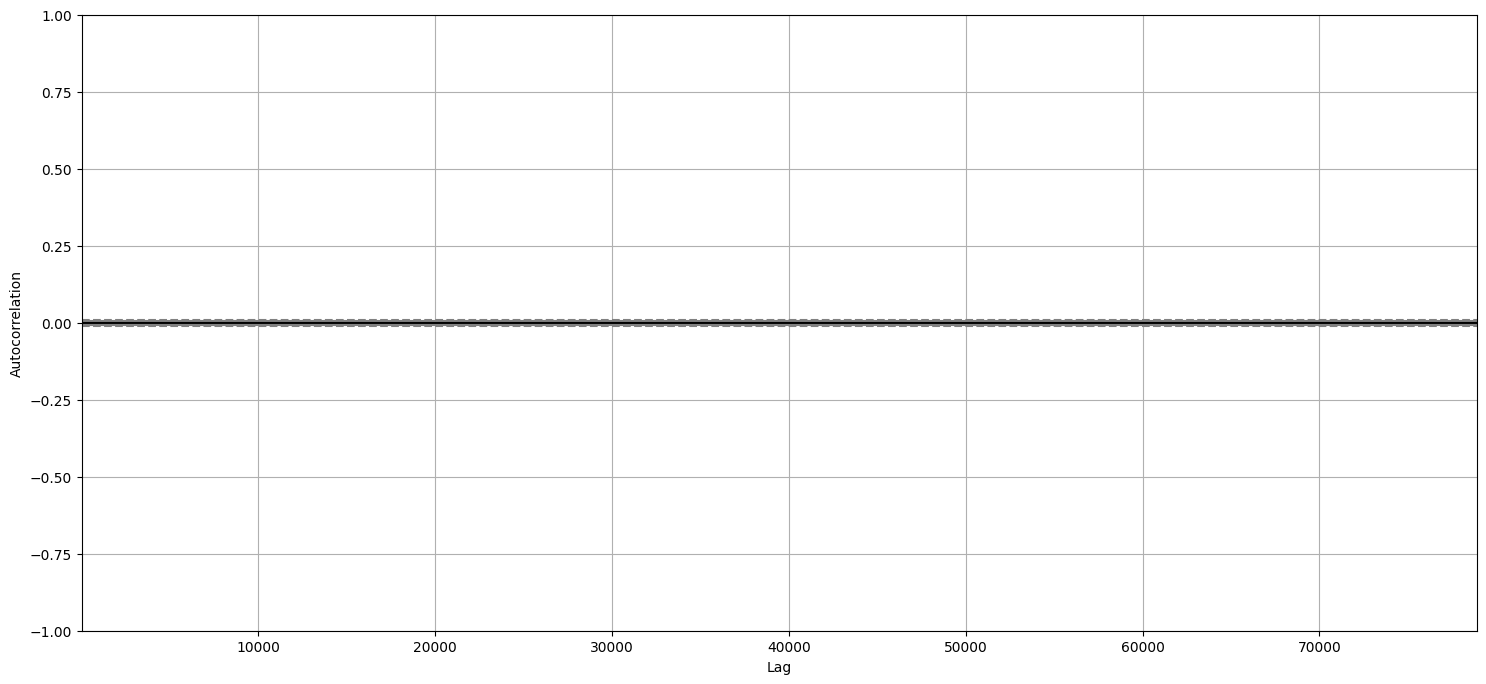

In [12]:
ax = autocorrelation_plot(dados['tCond'])
ax.figure.set_size_inches(18, 8)

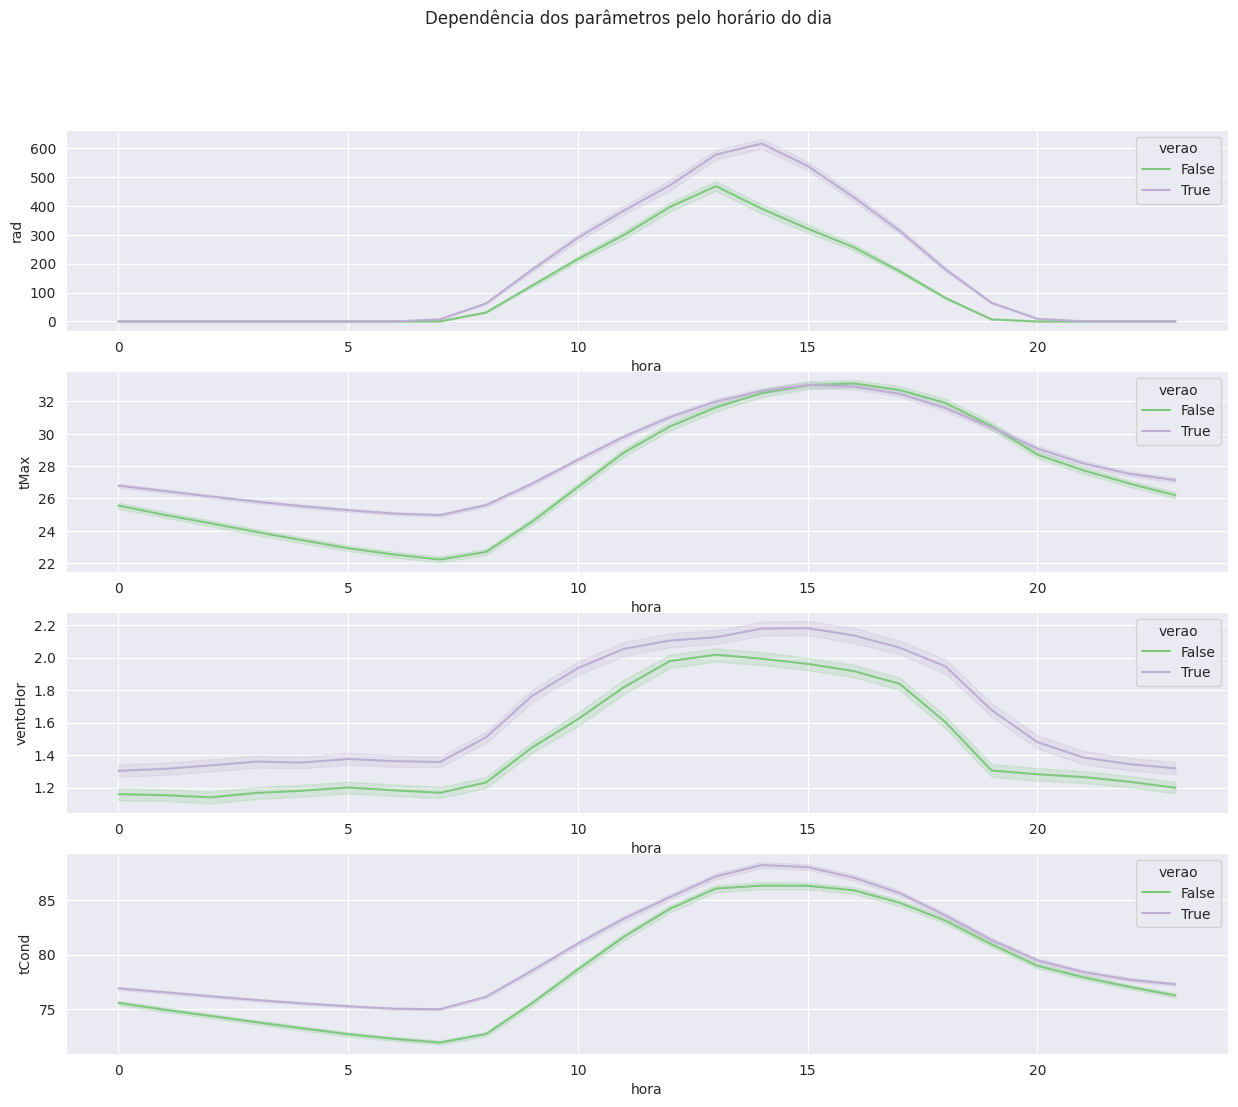

In [24]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
fig, axs = plt.subplots(4)
fig.suptitle('Dependência dos parâmetros pelo horário do dia')
sns.lineplot(ax=axs[0], data=dados, x="hora", y="rad", hue="verao")
sns.lineplot(ax=axs[1], data=dados, x="hora", y="tMax", hue="verao")
sns.lineplot(ax=axs[2], data=dados, x="hora", y="ventoHor", hue="verao")
sns.lineplot(ax=axs[3], data=dados, x="hora", y="tCond", hue="verao")
fig.set_size_inches(15, 12)

NameError: name 't0' is not defined

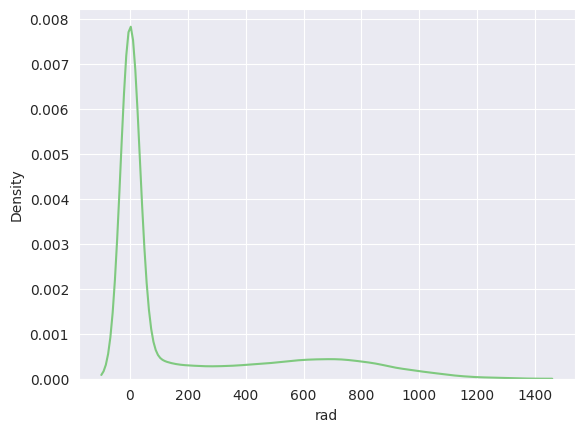

In [12]:
ax = sns.kdeplot(dados['rad'])
ax.plot(t0, pdf.pdf(t0), 'g--', label='tCond Simplificado')
ax

## Modelo simplificado
Distribuição log-normal de três parâmetros:
$$f(t) = \frac{1}{(t-t_{min}) \beta \sqrt{2 \pi}} \exp \left \lbrace -\frac{[\ln (t - t_{min}) - \alpha]^2}{2 \beta^2} \right \rbrace$$

In [32]:
# Ajustes dos parâmetros conforme obtido no método completo
tmed = dados['tCond'].mean()
tmin = dados['tCond'].min()
tdp = dados['tCond'].std()
beta = sqrt(log((tdp / (tmed - tmin)) ** 2 + 1))
alpha = log(tmed - tmin) - 0.5 * beta ** 2
print(tmed, tmin, tdp, alpha, beta)
t0 = np.linspace(tmin, tmin + 100, 100)
pdf = lognorm(loc=tmin, s=beta, scale=np.exp(alpha))

# Aproximações 
tmedmax = dados['tMax'].mean()
dp = 12


73.96926550077451 28.844487817275134 13.629841450844669 3.7657774131615223 0.2954795316022144


<Axes: >

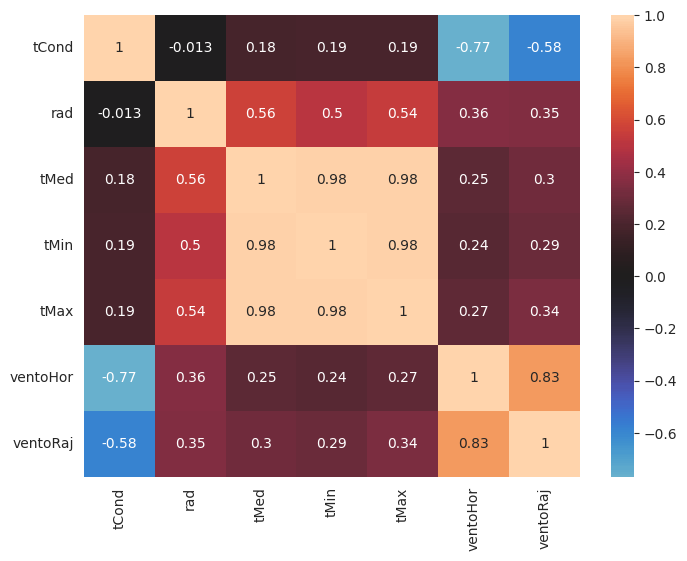

In [33]:
corr = dados[['tCond','rad','tMed','tMin','tMax','ventoHor','ventoRaj']].corr()
ax = sns.heatmap(corr, center=0, annot=True)
ax.figure.set_size_inches(8, 6)
ax

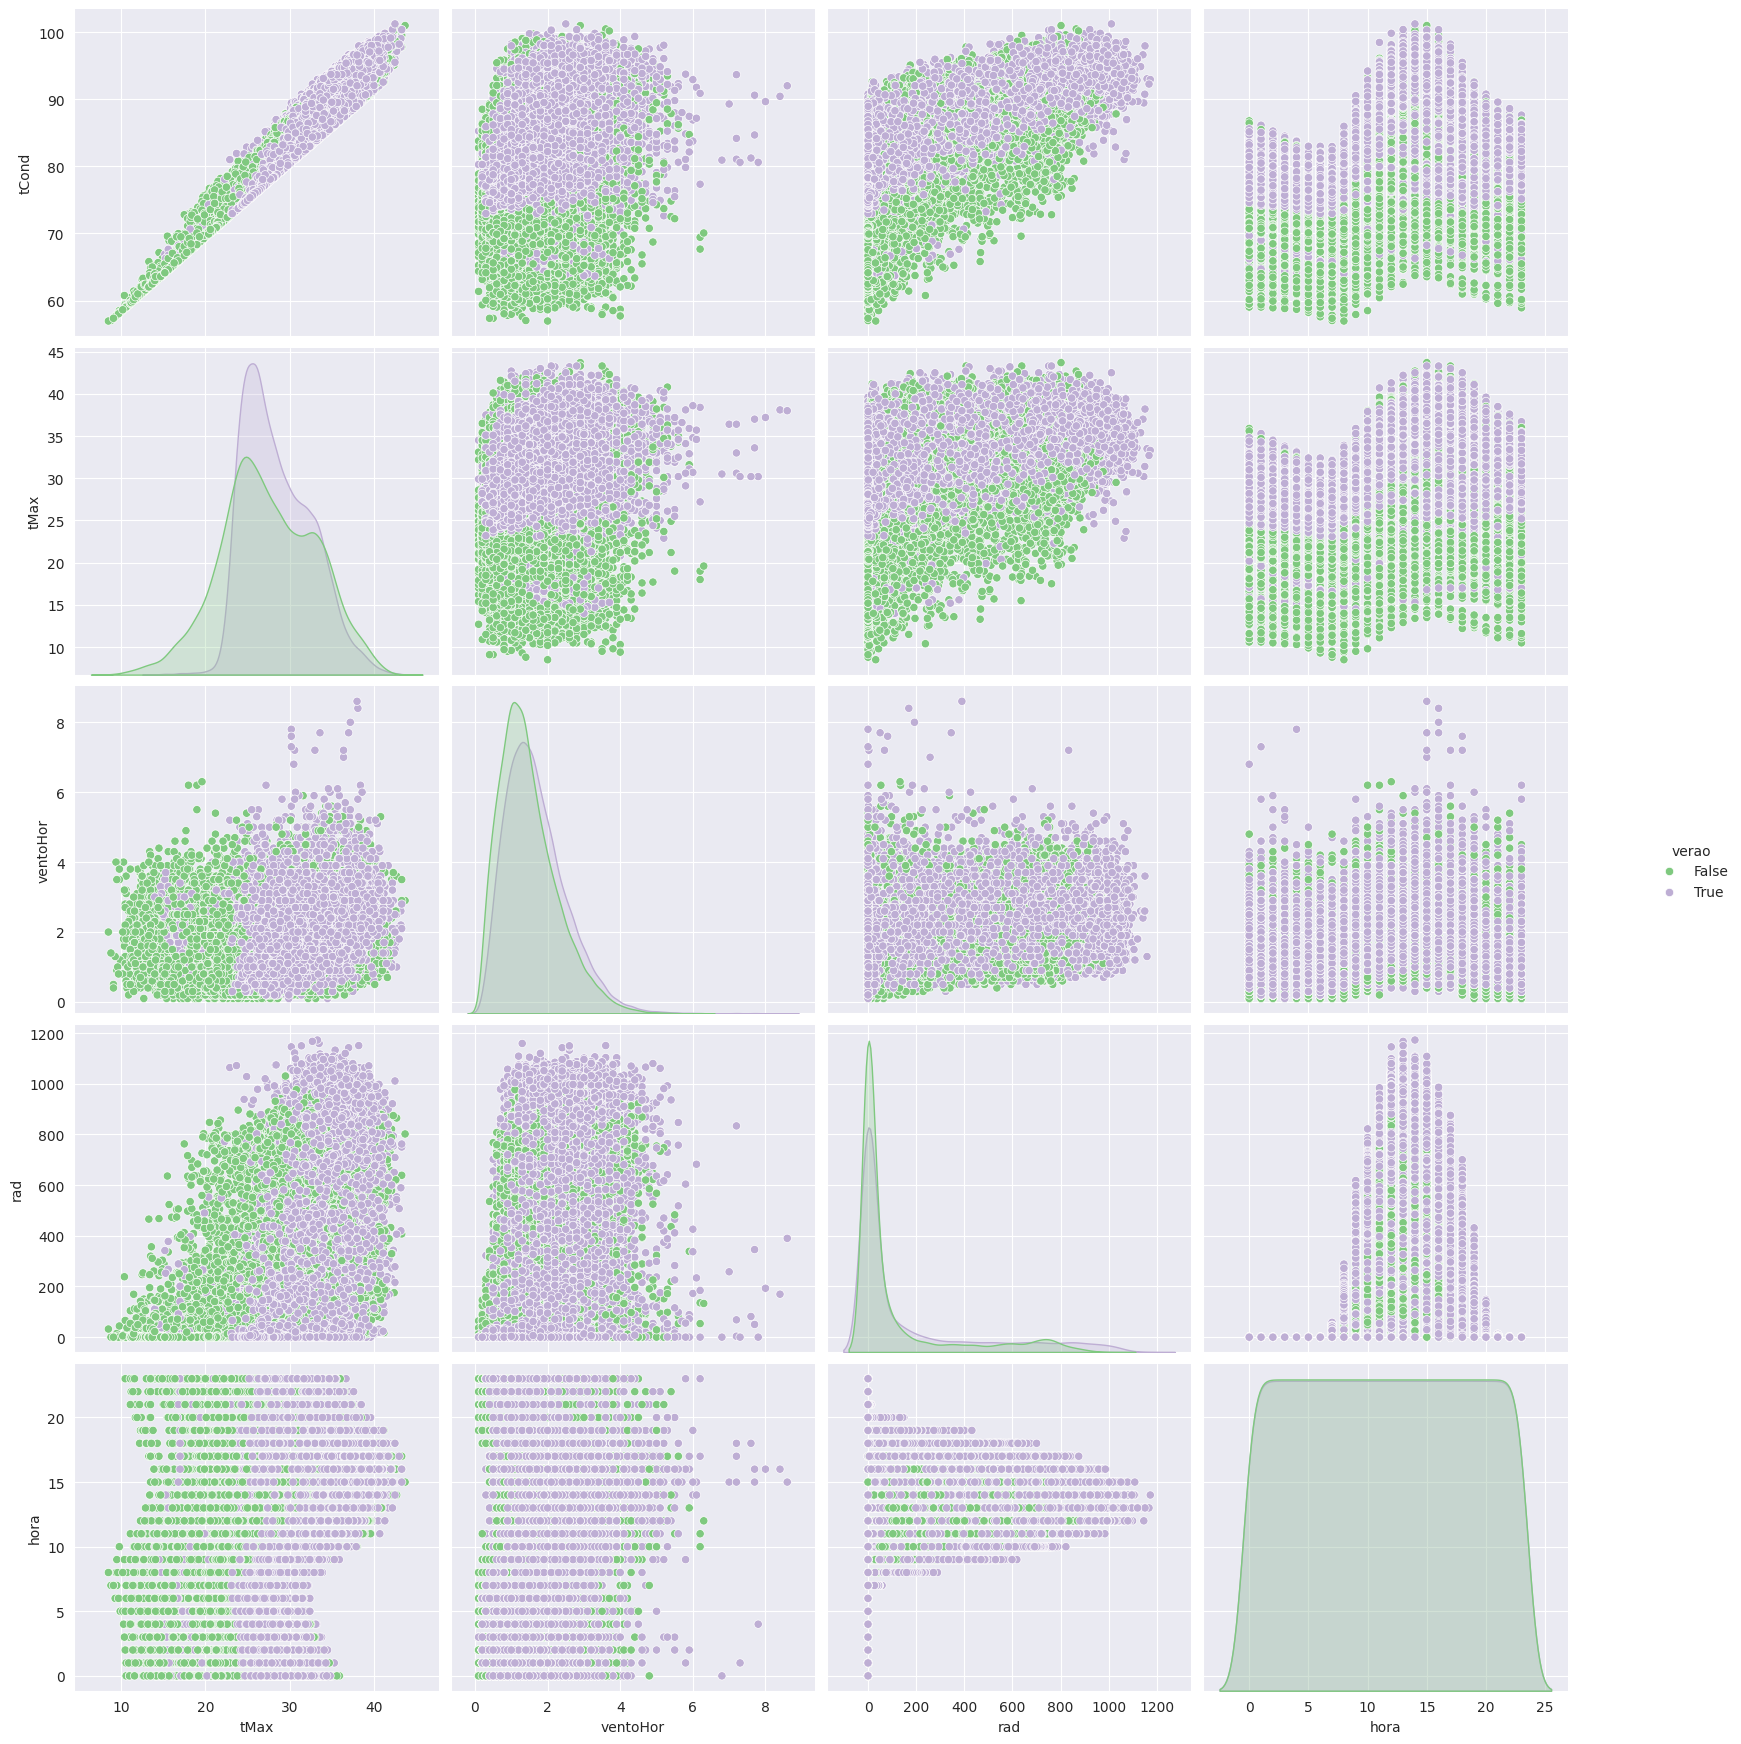

In [25]:
ax = sns.pairplot(dados, y_vars=['tCond','tMax','ventoHor','rad', 'hora'], x_vars=['tMax','ventoHor','rad', 'hora'], hue="verao")
ax.figure.set_size_inches(18, 18)

<Axes: ylabel='Density'>

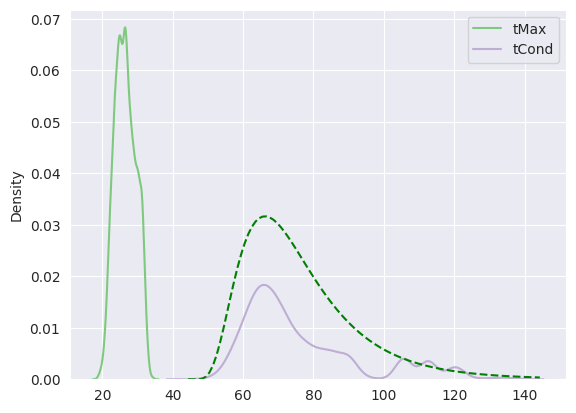

In [15]:
ax = sns.kdeplot(dados[['tMax','tCond']])
ax.plot(t0, pdf.pdf(t0), 'g--', label='tCond Simplificado')
ax

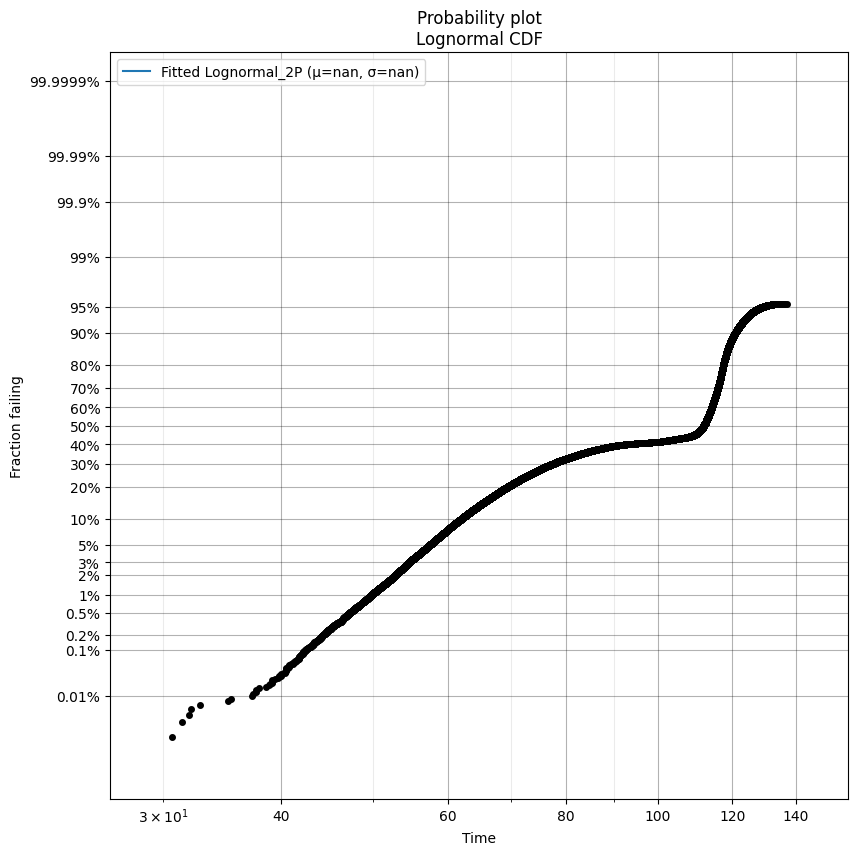

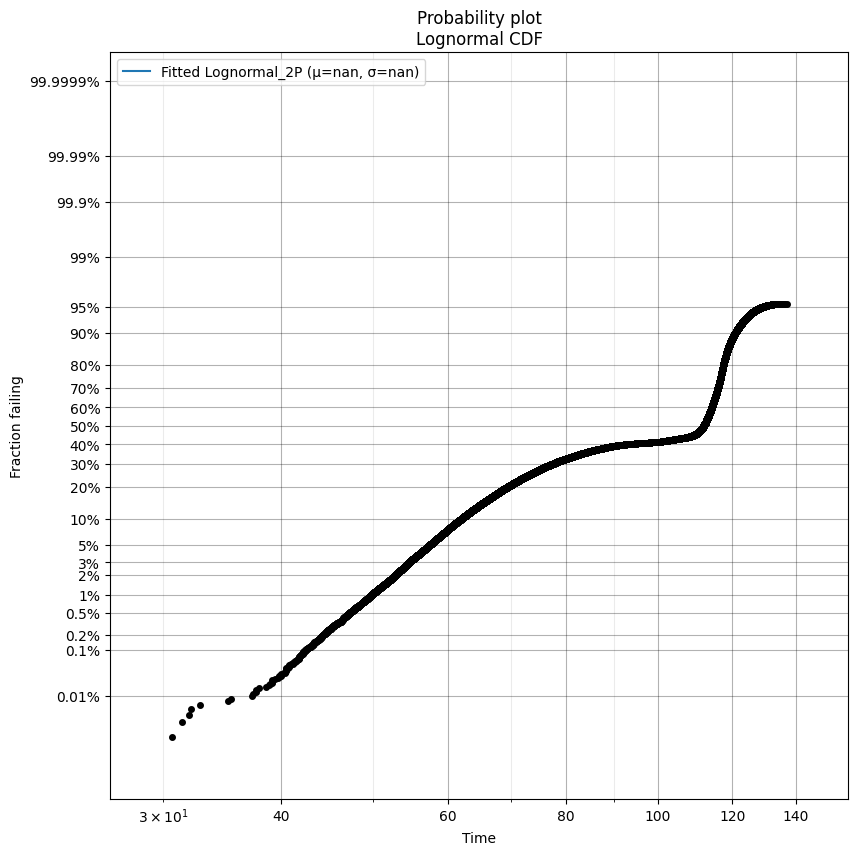

In [33]:
Lognormal_probability_plot(failures=dados['tCond'].to_numpy())

<Axes: ylabel='Density'>

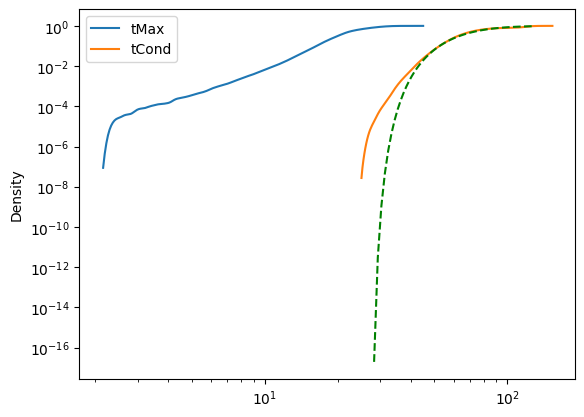

In [29]:
ax = sns.kdeplot(dados[['tMax','tCond']], cumulative=True, common_norm=False, log_scale=[True, True])
ax.plot(t0, pdf.cdf(t0), 'g--', label='tCond Simplificado')
ax

<Axes: title={'center': 'Temperatura (°C)'}, xlabel='tCond', ylabel='dia'>

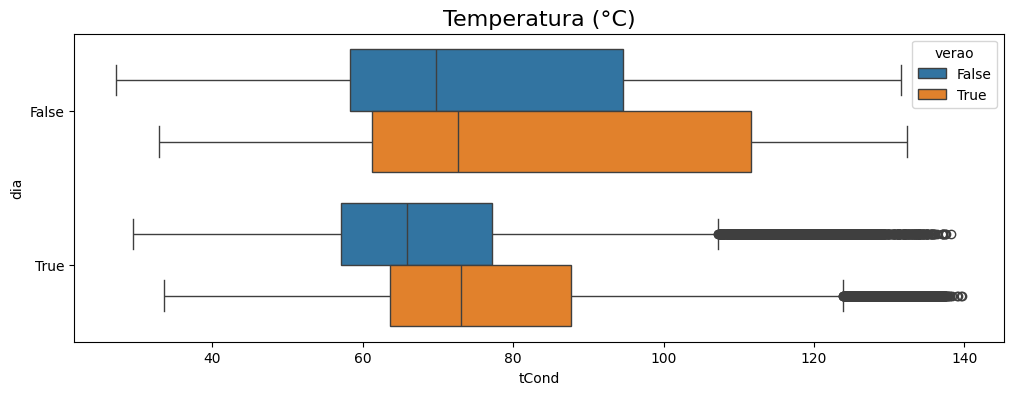

In [30]:
ax = sns.boxplot(data=dados, x="tCond", y="dia", hue="verao", orient='h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Temperatura (°C)', fontsize=16)
ax

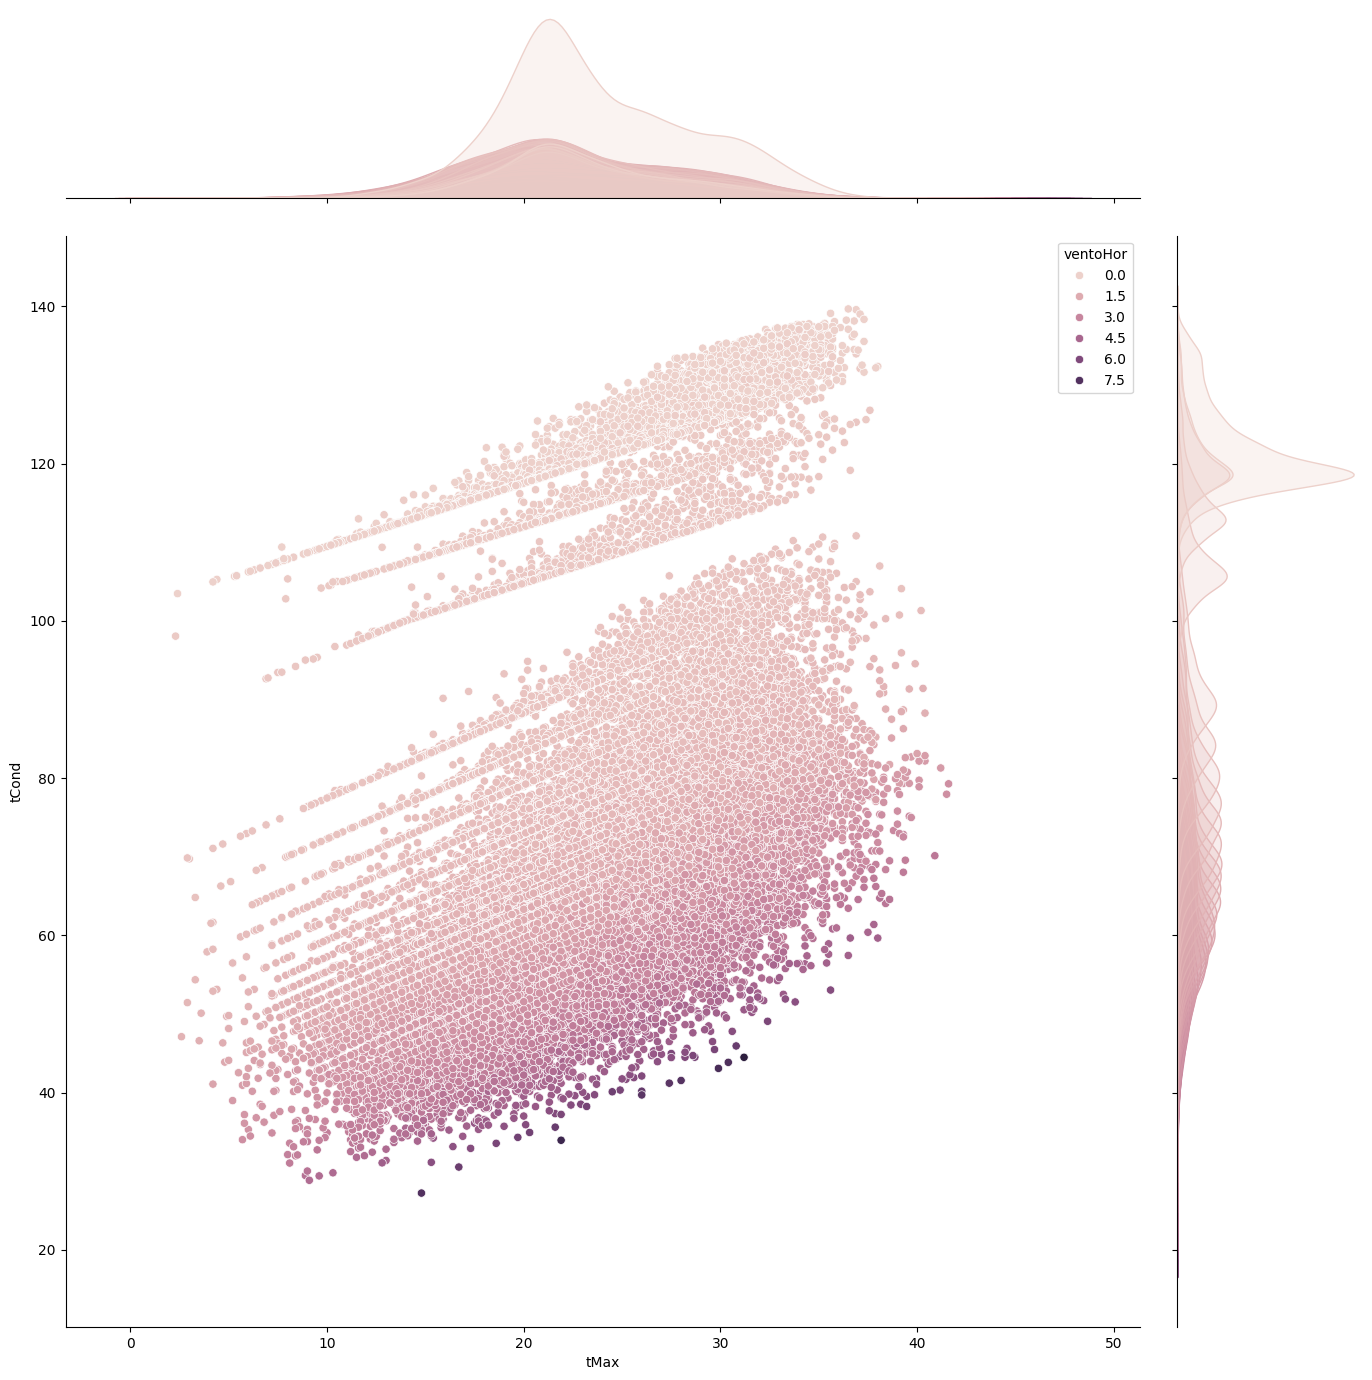

In [34]:
ax = sns.jointplot(x="tMax", y="tCond", data=dados, hue="ventoHor")
ax.figure.set_size_inches(15, 15)
ax

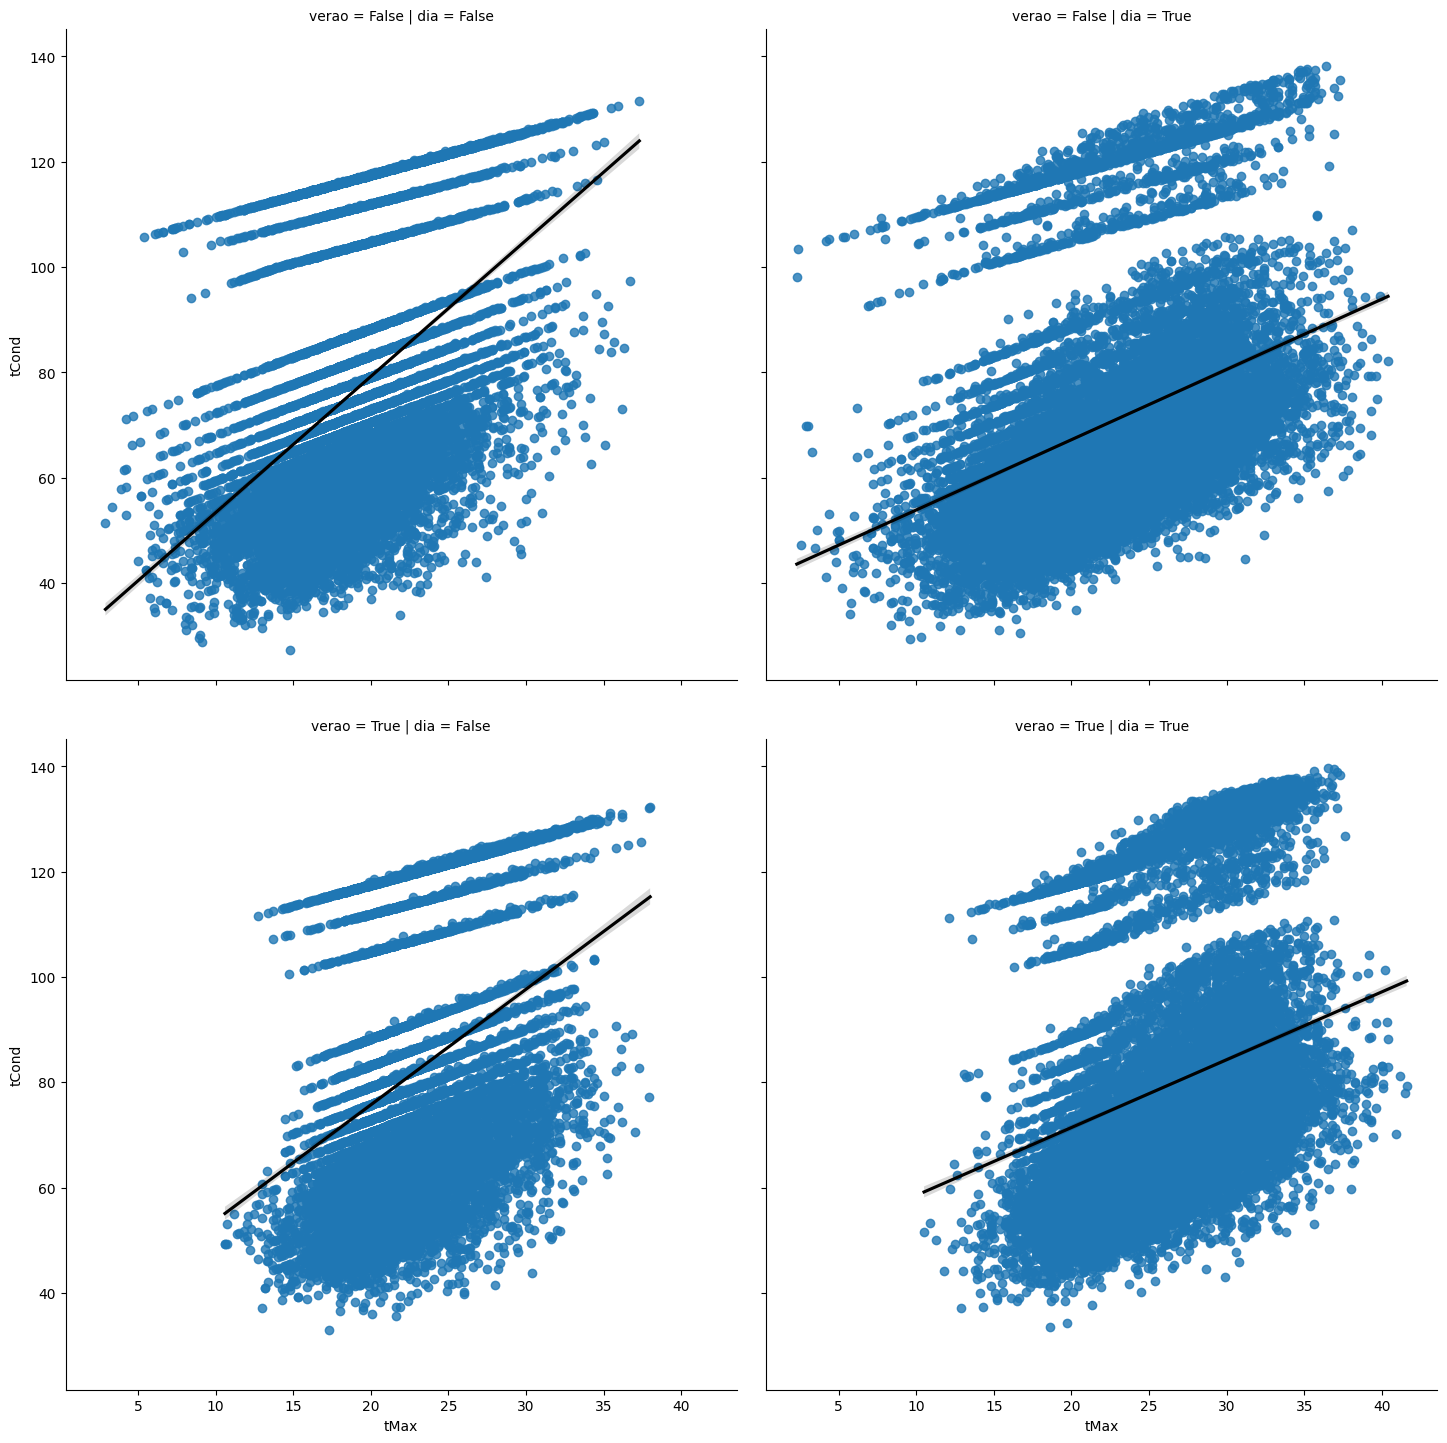

In [33]:
ax = sns.lmplot(x="tMax", y="tCond", data=dados, col="dia", row="verao", line_kws={"ls": "-", "color": 'black'})
ax.figure.set_size_inches(15, 15)
ax

<Axes: xlabel='hora', ylabel='mes'>

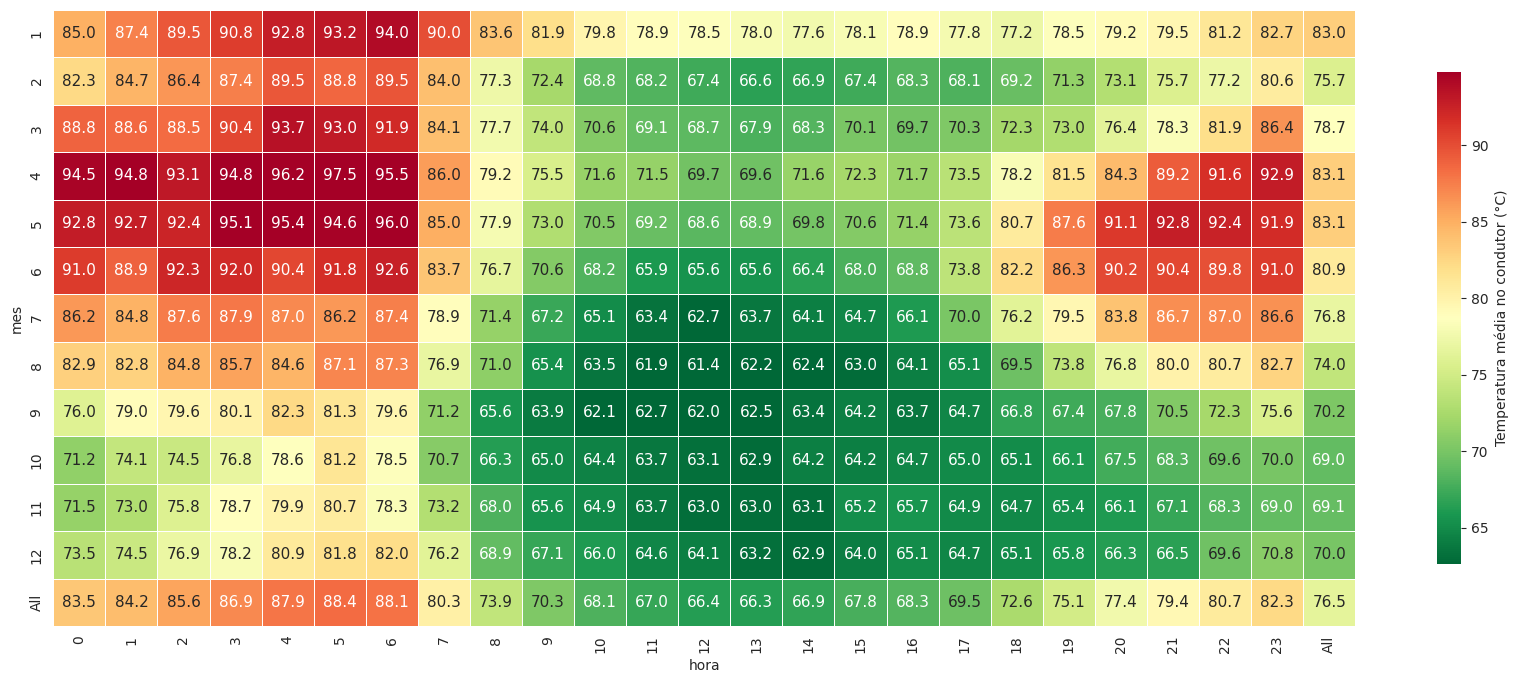

In [16]:
pivo = pd.pivot_table(dados, values="tCond", index="mes", columns="hora", margins=True)
ax = sns.heatmap(pivo, cmap='RdYlGn_r',
                 robust=True,
                 fmt='.1f',
                 annot=True,
                 linewidths=.5,
                 annot_kws={'size':11},
                 cbar_kws={'shrink':.8, 'label':'Temperatura média no condutor (°C)'})   
ax.figure.set_size_inches(21, 8)
ax